In [124]:
import os
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split

# Diretório onde estão as imagens de todas as vogais
dataset_path = Path(os.path.join('C:',os.sep, 'Users', 'Gabriel', 'Desktop', 'FACUL 6ª SEM', 'APS-PI-6SEM', 'dataset', 'v20220930_partial'))

In [125]:
# Lista para armazenar as imagens e seus rótulos correspondentes ('i' ou outras vogais)
images = []
labels = []

In [126]:
# Lista de letras que serão consideradas ('i' para 'I' e 'i', e outras vogais)
target_letters = ['a_l', 'A_u', 'e_l', 'E_u', 'i_l', 'I_u', 'o_l', 'O_u', 'u_l', 'U_u']

In [127]:
# Percorrer o diretório de cada letra e carregar as imagens
for letter in target_letters:
    letter_path = os.path.join(dataset_path, letter)
    for image_file in os.listdir(letter_path):
        image_path = os.path.join(letter_path, image_file)
        for imagem in os.listdir(image_path):
            imagem_final = os.path.join(image_path, imagem)
            image = imread(imagem_final)
            image = cv2.resize(image, (64, 64))  # Redimensionar para um tamanho específico
            images.append(image)
            labels.append(1 if (letter.startswith('i') or letter.startswith('I'))  else 0)  # Rotular 'i' como 1 e outras vogais como 0

In [146]:
#print(images)
#print(labels)
# Convertendo listas em arrays numpy
images = np.array(images)
labels = np.array(labels)

(64, 64, 3)


In [129]:
# Dividir os dados em conjunto de treino e teste (80% treino, 20% teste)
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)


In [113]:
#Normalização dos valores de pixel para o intervalo [0, 1]
#X_train = X_train.astype('float32') / 255.0
#X_test = X_test.astype('float32') / 255.0


In [130]:
# Verificando as formas (shapes) dos conjuntos de dados
print("Formato dos dados de treino:", X_train.shape)
print("Formato dos rótulos de treino:", y_train.shape)
print("Formato dos dados de teste:", X_test.shape)
print("Formato dos rótulos de teste:", y_test.shape)

Formato dos dados de treino: (720, 64, 64, 3)
Formato dos rótulos de treino: (720,)
Formato dos dados de teste: (180, 64, 64, 3)
Formato dos rótulos de teste: (180,)


In [131]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Definindo a arquitetura da CNN
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))  # Saída binária (i ou não-i)

In [132]:
# Compilação do modelo
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [133]:
# Treinamento do modelo
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
23/23 [==============================] - 4s 74ms/step - loss: 0.3724 - accuracy: 0.8125 - val_loss: 0.1652 - val_accuracy: 0.9667
Epoch 2/10
23/23 [==============================] - 1s 54ms/step - loss: 0.0782 - accuracy: 0.9708 - val_loss: 0.0860 - val_accuracy: 0.9778
Epoch 3/10
23/23 [==============================] - 1s 56ms/step - loss: 0.0434 - accuracy: 0.9861 - val_loss: 0.1308 - val_accuracy: 0.9722
Epoch 4/10
23/23 [==============================] - 1s 55ms/step - loss: 0.0451 - accuracy: 0.9847 - val_loss: 0.1082 - val_accuracy: 0.9778
Epoch 5/10
23/23 [==============================] - 1s 54ms/step - loss: 0.0113 - accuracy: 0.9986 - val_loss: 0.1064 - val_accuracy: 0.9778
Epoch 6/10
23/23 [==============================] - 1s 55ms/step - loss: 0.0114 - accuracy: 0.9944 - val_loss: 0.1268 - val_accuracy: 0.9778
Epoch 7/10
23/23 [==============================] - 1s 54ms/step - loss: 0.0059 - accuracy: 0.9986 - val_loss: 0.1231 - val_accuracy: 0.9778
Epoch 8/10
23

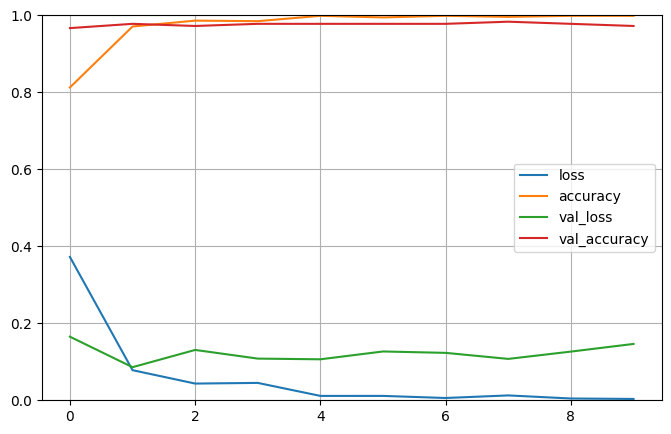

In [134]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

In [135]:
# Avaliação do modelo
evaluation = model.evaluate(X_test, y_test)
print(f"Acurácia: {evaluation[1]}")

6/6 [==============================] - 0s 15ms/step - loss: 0.1464 - accuracy: 0.9722
Acurácia: 0.9722222089767456


In [144]:
def preprocess_image(image_path):
    # Carrega a imagem e redimensiona para o mesmo tamanho usado no treinamento
    image = cv2.imread(image_path)
    image = cv2.resize(image, (64, 64))
    # Normaliza os valores dos pixels para o intervalo [0, 1]
    #image = image.astype('float32') / 255.0
    # Adapta o formato da imagem para ser compatível com o modelo (número de dimensões)
    image = np.expand_dims(image, axis=0)
    print(image.shape)
    return image

In [137]:
def predict_image(model, image_path):
    # Pré-processa a imagem
    image = preprocess_image(image_path)
    # Faz a previsão usando o modelo fornecido
    prediction = model.predict(image)
    # Converte a previsão em texto
    if prediction[0][0] > 0.5:
        return "A imagem é a letra 'i' (maiúscula ou minúscula)"
    else:
        return "A imagem não é a letra 'i'"

In [148]:
result = predict_image(model, '../img/teste_false_9.jpeg')
print(result)

(1, 64, 64, 3)
1/1 [==============================] - 0s 45ms/step
A imagem não é a letra 'i'
